# Heatmaps of Normalized Counts

Heatmap was actually created to visualize how the normalized counts of the control and parkinson's disease look like. Comparison of the genes can be easily done because of the fact that each number of counts have different color on the heatmaps color scale. For this purpose the [normalized counts data](/data/parkinsonNorm.txt) sets was used, then four different heatmaps were generated for the <span style='color:green'>Parkinson's Disease</span> data set, they are heatmap of intersection between the proteomics protein and RNA-Seq protein coding genes, <span style='color:red'>heatmaps of the top 10 genes with the highest and lowest p-value</span>, and the last one is heatmap of the entire RNA-Seq protein coding genes.

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import os

os.chdir('data')

In [2]:
# Import the Parkinson's Disease normalized counts data
parDat = pd.read_table('parkinsonNorm.txt')

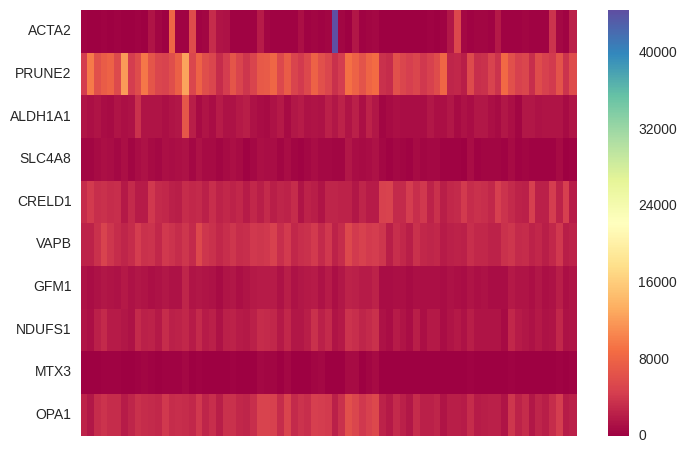

In [3]:
# Declare the variable of list of the intersection between the RNA-Seq protein coding genes and proteomics proteins
intersectGenes = ['ACTA2', 'PRUNE2', 'ALDH1A1', 'SLC4A8', 'CRELD1', 'VAPB', 'GFM1', 'NDUFS1', 'MTX3', 'OPA1']
intersectGenesNormCounts = parDat[parDat['symbol'] == intersectGenes[0]]

# Build the table of the intersectGenes
for gene in intersectGenes[1:]:
    intersectGenesNormCount = parDat[parDat['symbol'] == gene]
    intersectGenesNormCounts = intersectGenesNormCounts.append(intersectGenesNormCount)

# Generate the heatmap of the normalized counts
sns.heatmap(intersectGenesNormCounts.ix[:,2:], yticklabels=list(intersectGenesNormCounts['symbol']), xticklabels=False,
            cmap='Spectral')

The heatmap which is generated using the normalized counts of the intersection between the control and Parkinson's disease looks fairly well distributed (by fairly distributed it means that the colors aren't really that extremely different between the samples), except for that dark blue point in ACTA2 (one of the PD sample).

In [4]:
# Declare the variable that stores the mean of controls and mean of Parkinson's disease samples
meanCont = intersectGenesNormCounts.ix[:,2:46].mean(axis=1)
meanPD = intersectGenesNormCounts.ix[:,46:].mean(axis=1)

# Generate table from the mean of the controls and Parkinson's disease samples
meanTable = pd.DataFrame({'symbol': intersectGenesNormCounts['symbol'], 'control mean' : meanCont,
                          'PD mean': meanPD, 'ratio': meanPD/meanCont})
meanTable[['symbol', 'control mean', 'PD mean', 'ratio']].reset_index(drop=True)

,symbol,control mean,PD mean,ratio
0,ACTA2,1822.685552,759.101887,0.416474
1,PRUNE2,6539.564302,4800.740868,0.734107
2,ALDH1A1,1694.756986,1199.977291,0.708053
3,SLC4A8,834.630323,427.757247,0.512511
4,CRELD1,2682.181019,3392.898918,1.264978
5,VAPB,3732.707399,2886.333885,0.773255
6,GFM1,1667.467415,1244.209948,0.746167
7,NDUFS1,2422.798910,1603.487771,0.661833
8,MTX3,273.708103,122.884282,0.448961
9,OPA1,3632.387329,2490.458768,0.685626


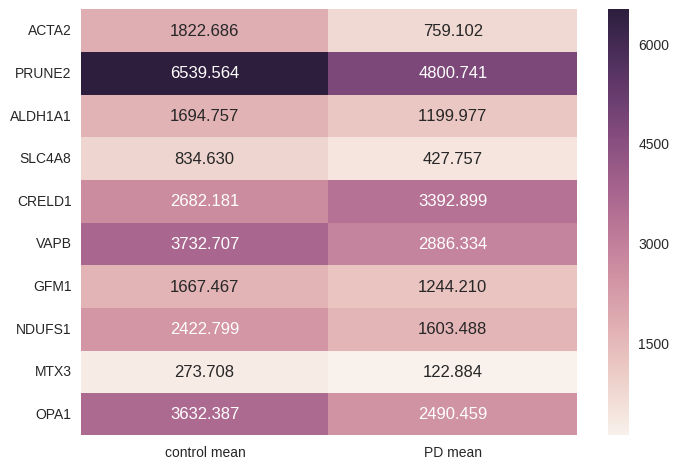

In [5]:
# Generate the heatmap for the mean of controls and mean of Parkinson's disease samples
sns.heatmap(meanTable[['control mean', 'PD mean']], yticklabels=list(meanTable['symbol']), annot=True, fmt='.3f')

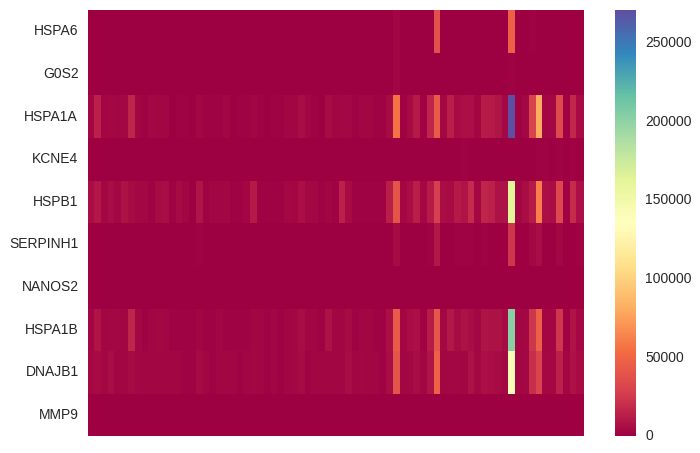

In [6]:
# Declare the variable of list of the top 10 genes with the highest log2 fold change values from the RNA-Seq
hFCGenes = ['HSPA6', 'G0S2', 'HSPA1A', 'KCNE4', 'HSPB1', 'SERPINH1', 'NANOS2', 'HSPA1B', 'DNAJB1', 'MMP9']
hFCGenesNormCounts = parDat[parDat['symbol'] == hFCGenes[0]]

# Build the table of the top 10 genes with the highest log2 fold change values from the RNA-Seq
for gene in hFCGenes[1:]:
    hFCGenesNormCount = parDat[parDat['symbol'] == gene]
    hFCGenesNormCounts = hFCGenesNormCounts.append(hFCGenesNormCount)

# Generate the heatmap of the normalized counts
sns.heatmap(hFCGenesNormCounts.ix[:,2:], yticklabels=list(hFCGenesNormCounts['symbol']), xticklabels=False,
            cmap='Spectral')

On the top 10 genes with the highest log<sub>2</sub> fold change value we can clearly see that the expression in PD is relatively higher than those in the control, this is proven by the fact that the colors for the PD samples are brighther than the ones in control.

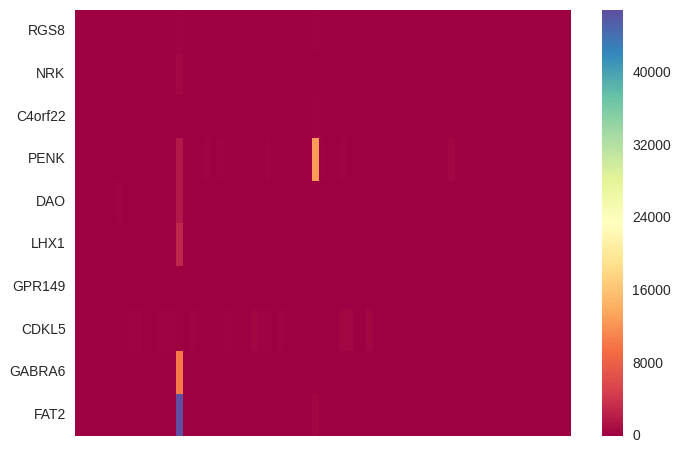

In [7]:
# Declare the variable of list of the top 10 genes with the lowest log2 fold change values from the RNA-Seq
lFCGenes = ['RGS8', 'NRK', 'C4orf22', 'PENK', 'DAO', 'LHX1', 'GPR149', 'CDKL5', 'GABRA6', 'FAT2']
lFCGenesNormCounts = parDat[parDat['symbol'] == lFCGenes[0]]

# Build the table of the top 10 genes with the lowest log2 fold change values from the RNA-Seq
for gene in lFCGenes[1:]:
    lFCGenesNormCount = parDat[parDat['symbol'] == gene]
    lFCGenesNormCounts = lFCGenesNormCounts.append(lFCGenesNormCount)

# Generate the heatmap of the normalized counts    
sns.heatmap(lFCGenesNormCounts.ix[:,2:], yticklabels=list(lFCGenesNormCounts['symbol']), xticklabels=False,
            cmap='Spectral')


In [8]:
# Declare the variable of all of the genes with p-value < 0.05 from the RNA-seq genes
lPVGenes = []
with open('lowPValPD.txt', 'r') as filename:
    for gene in filename:
        lPVGenes.append(gene.strip())
lPVGenesNormCounts = parDat[parDat['symbol'] == lPVGenes[0]]

# Build the table of all of the genes with p-value < 0.05 from the RNA-seq genes
for gene in lPVGenes[1:]:
    lPVGenesNormCount = parDat[parDat['symbol'] == gene]
    lPVGenesNormCounts = lPVGenesNormCounts.append(lPVGenesNormCount)

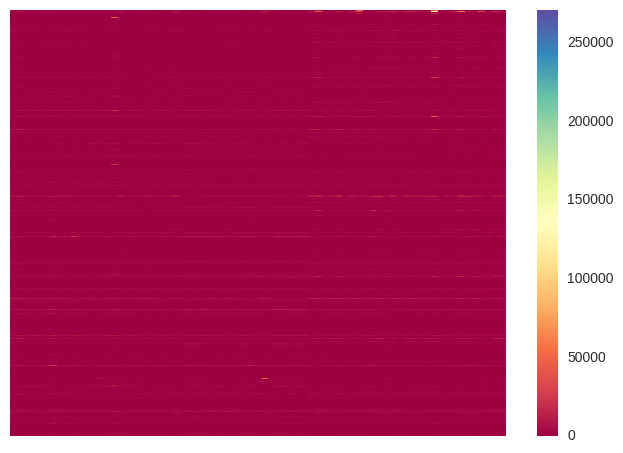

In [9]:
# Generate the heatmap of the normalized counts 
sns.heatmap(lPVGenesNormCounts.ix[:,2:], yticklabels=False, xticklabels=False, cmap='Spectral')

From the heatmap of all of the genes (1095 of total) with the p-value < 0.05 we can't conclude anything but as we can see there are several genes which are expressed higher than the other and there are several genes with high very high number of normalized counts compared to the others.

In [10]:
# Import the Huntington's Disease normalized counts data
huntDat = pd.read_table('huntNorm.txt')

In [11]:
# Import the data of top 10 genes with the lowest p-val in Huntington's Disease data set and retrieve the EnsemblIDs
# instead ofthe symbols
lPVHuntGenEns = pd.read_table('top10lowPVHunt.txt')
lPVHuntGenes = list(lPVHuntGenEns['EnsemblID'])

In [12]:
# Declare the variable of list of the top 10 genes with the highest log2 fold change values from the RNA-Seq
lPVHuntGenesNormCounts = huntDat[huntDat['EnsemblID'].str.contains(lPVHuntGenes[0])]

# Build the table of the top 10 genes with the highest log2 fold change values from the RNA-Seq
for gene in lPVHuntGenes[1:]:
    lPVHuntGenesNormCount = huntDat[huntDat['EnsemblID'].str.contains(gene)]
    lPVHuntGenesNormCounts = lPVHuntGenesNormCounts.append(lPVHuntGenesNormCount)

# Replace all of the EnsemblIDs in the main table with the HGNC symbols
lPVHuntGenesNormCounts['EnsemblID'] = list(lPVHuntGenEns['symbol'])
lPVHuntGenesNormCounts = lPVHuntGenesNormCounts.rename(columns={'EnsemblID':'symbol'})

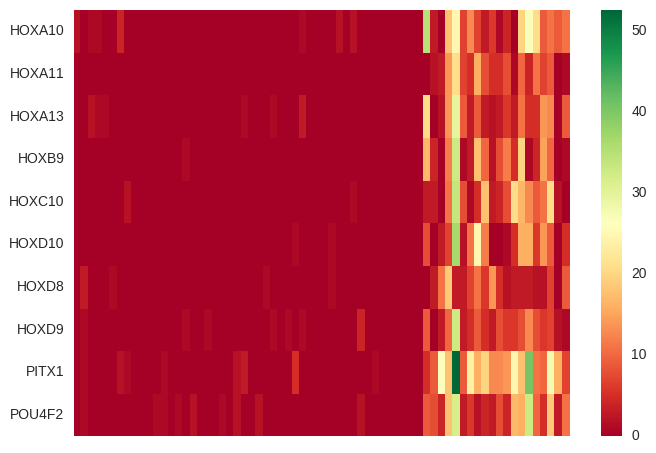

In [13]:
# Generate the heatmap for the normalized counts
sns.heatmap(lPVHuntGenesNormCounts.ix[:, 2:], yticklabels=list(lPVHuntGenesNormCounts['symbol']), xticklabels=False,
            cmap='RdYlGn')

The differences between the normalized counts of the control and the Huntington's disease sample in the top 10 genes with the highest p-value is relatively more visible than those in the PD (<span style='color:green'><strong>see above</strong></span>).

In [14]:
# Import the lowPvalData and split it to create list of genes
lPVHuntAllGenes = open('lowPValHunt.txt', 'r').read()
lPVHuntAllGenes = lPVHuntAllGenes.split(' ')

# Iterate through the huntDat data to retrieve the normalized counts of each 
lPVHuntAllGenesNCs = huntDat[huntDat['EnsemblID'] == lPVHuntAllGenes[0]]
for ensemblID in lPVHuntAllGenes[1:]:
    lPVHuntAllGenesNC = huntDat[huntDat['EnsemblID'] == ensemblID]
    lPVHuntAllGenesNCs = lPVHuntAllGenesNCs.append(lPVHuntAllGenesNC)

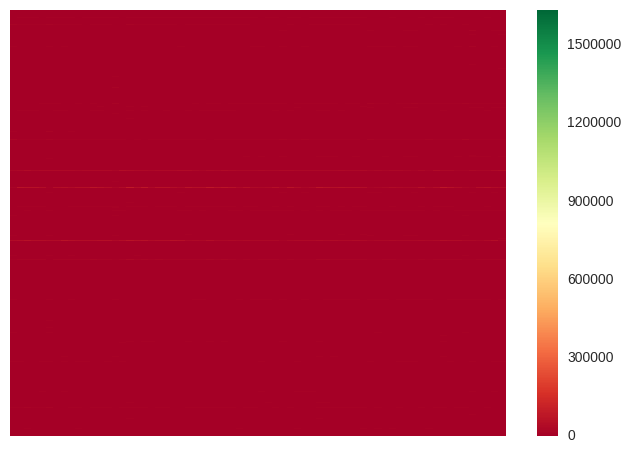

In [15]:
sns.heatmap(lPVHuntAllGenesNCs.ix[:,2:], yticklabels=False, xticklabels=False, cmap='RdYlGn')